In [40]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt



def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean
    
    
def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean
    
def getDataCSV(symbol):
    return pd.read_csv("data/{}.csv".format(str(symbol)), header =0, usecols=['Date','Close'],index_col=['Date'])

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()
    
def plotHistData(df,title="",x="",y="",b=20,mean=999,std=999):
    ax = df.hist(bins=b)
    ax.set_title = title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if (mean != 999) and (std != 999) :
        plt.axvline(mean,color="y",linestyle="dashed",linewidth=2)
        plt.axvline(std,color="r",linestyle="dashed",linewidth=2)
        plt.axvline(-std,color="r",linestyle="dashed",linewidth=2)
    plt.show()
    
def plotHistDataMulti(df,tickers,title="",x="",y="",b=20,mean=999,std=999):
    for symbol in tickers:
        df[str(symbol)].hist(bins=20, label=str(symbol))
    plt.legend(loc='upper right')
    plt.show()
    
def dailyReturns(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    dr.iloc[0] = 0
    #dr.iloc[0,:] = 0
    return dr

def dailyReturnsMulti(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    #dr.iloc[0] = 0
    dr.iloc[0,:] = 0
    return dr
    
def plotScatterMulti(df,x="",y="",polyDegree=1):
    global beta,alpha
    df.plot(kind='scatter',x=str(x),y=str(y))
    beta,alpha = np.polyfit(df[str(x)],df[str(y)],polyDegree) 
    plt.plot(df[str(x)], beta*df[str(x)] + alpha,'-', color='r')
    plt.show()
    
def predictor(X):
    Y = beta*X + alpha
    return Y




In [67]:
google = getDataYahoo("GOOG",'2016-10-01','2017-01-01',"Adj Close")
market = getDataYahoo("SPY",'2016-10-01','2017-01-01',"Adj Close")
test_SPY = getDataYahoo("SPY",'2017-01-02','2017-03-01',"Adj Close")
test_GOOG = getDataYahoo("GOOG",'2017-01-02','2017-03-01',"Adj Close")
newDummy = getDataYahoo(["SPY","GOOG"],'2017-01-01','2017-01-15',"Adj Close")
g = google.as_matrix()
m = market.as_matrix()
t_s = test_SPY.as_matrix()
t_g = test_GOOG.as_matrix()
true_g = newDummy.as_matrix()




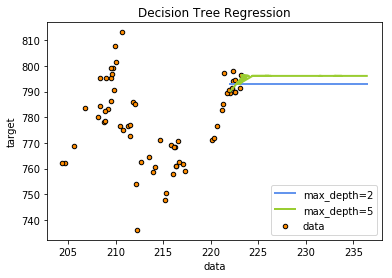

In [68]:
# Fit regression model
plt.figure(figsize=(50,10))
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(m[:, np.newaxis], g[:, np.newaxis])
regr_2.fit(m[:, np.newaxis], g[:, np.newaxis])

# Predict

y_1 = regr_1.predict(t_s[:, np.newaxis])
y_2 = regr_2.predict(t_s[:, np.newaxis])


# Plot the results
plt.figure()
plt.scatter(m[:, np.newaxis], g[:, np.newaxis], s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(t_s[:, np.newaxis], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(t_s[:, np.newaxis], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()




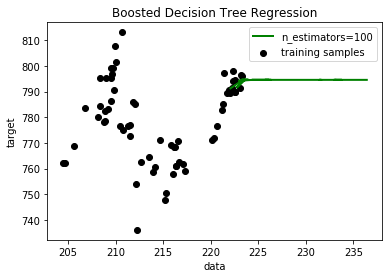

In [69]:
# Fit regression model
regr_1_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=1000, random_state=None)

regr_1_boost.fit(m[:, np.newaxis], g[:, np.newaxis])

# Predict
y_1_boost = regr_1_boost.predict(t_s[:, np.newaxis])

# Plot the results
plt.figure()
plt.scatter(m[:, np.newaxis], g[:, np.newaxis], c="k", label="training samples")
plt.plot(t_s[:, np.newaxis], y_1_boost, c="g", label="n_estimators=100", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [70]:
print (y_1_boost)

[ 791.26001   791.26001   794.559998  794.559998  794.559998  794.559998
  794.559998  794.559998  794.559998  794.559998  794.559998  794.200012
  794.559998  791.549988  794.559998  794.200012  794.559998  794.559998
  794.559998  794.559998  794.559998  794.559998  794.559998  794.559998
  794.559998  794.559998  794.559998  794.559998  794.559998  794.559998
  794.559998  794.559998  794.559998  794.559998  794.559998  794.559998
  794.559998  794.559998  794.559998  794.559998  794.559998  794.559998
  794.559998]


In [71]:
print(t_g)

[ 786.140015  786.140015  786.900024  794.02002   806.150024  806.650024
  804.789978  807.909973  806.359985  807.880005  807.880005  804.609985
  806.070007  802.174988  805.02002   819.309998  823.869995  835.669983
  832.150024  823.309998  802.320007  796.789978  795.695007  798.530029
  801.48999   801.340027  806.969971  808.380005  809.559998  813.669983
  819.23999   820.450012  818.97998   824.159973  828.070007  828.070007
  831.659973  830.76001   831.330017  828.640015  829.280029  823.210022
  835.23999 ]


In [72]:
print regr_1_boost.score(t_s[:,np.newaxis],t_g[:,np.newaxis])

-1.6764811992


In [73]:
print sqrt(mean_squared_error(t_g, y_1_boost))

22.6406948736
